In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# data is collected from kaggle
df = pd.read_csv('data/Sales data.csv')

In [3]:
df.head()

,Unnamed: 0,Date,Sales
0,0,2015-01-04,14.934283
1,1,2015-01-11,7.234714
2,2,2015-01-18,27.953771
3,3,2015-01-25,50.460597
4,4,2015-02-01,20.316933


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771
3,2015-01-25,50.460597
4,2015-02-01,20.316933


In [6]:
df.tail()

,Date,Sales
412,2022-11-27,2034.317717
413,2022-12-04,2095.553536
414,2022-12-11,2081.646280
415,2022-12-18,2065.030269
416,2022-12-25,2116.023040


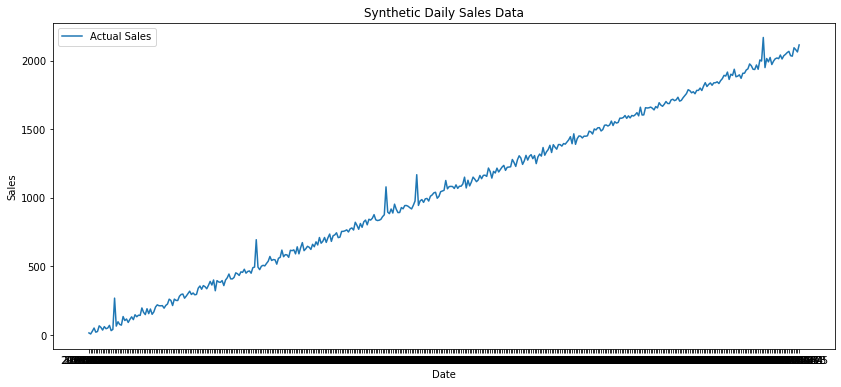

In [7]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [8]:
df.head()

,Date,Sales
0,2015-01-04,14.934283
1,2015-01-11,7.234714
2,2015-01-18,27.953771
3,2015-01-25,50.460597
4,2015-02-01,20.316933


In [9]:
df['Date'] = pd.to_datetime(df['Date']).dt.floor('D')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    417 non-null    datetime64[ns]
 1   Sales   417 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [10]:
df["DayOfYear"] = df["Date"].dt.dayofyear
df["WeekOfYear"] = df["Date"].dt.weekofyear
df["DayOfWeek"] = df["Date"].dt.dayofweek
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

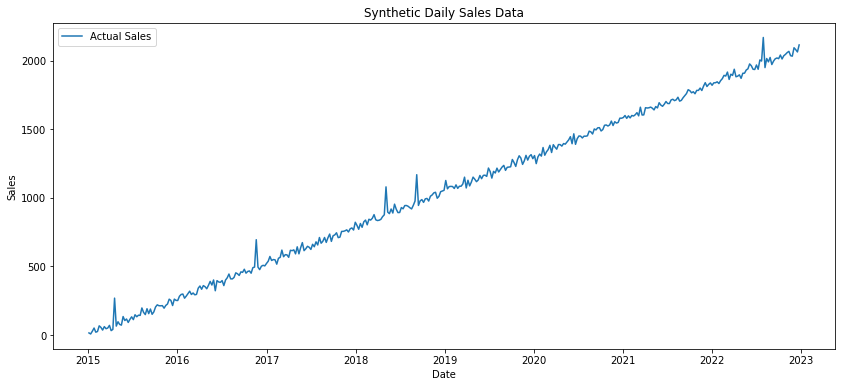

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales") #line chart
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [12]:
df.head()

,Date,Sales,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
0,2015-01-04,14.934283,4,1,6,1,2015
1,2015-01-11,7.234714,11,2,6,1,2015
2,2015-01-18,27.953771,18,3,6,1,2015
3,2015-01-25,50.460597,25,4,6,1,2015
4,2015-02-01,20.316933,32,5,6,2,2015


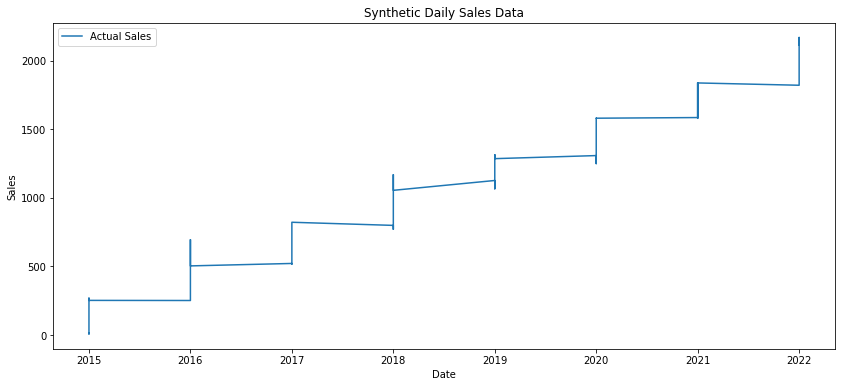

In [13]:
plt.figure(figsize=(14, 6))
plt.plot(df["Year"], df["Sales"], label="Actual Sales")
plt.title("Synthetic Daily Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [14]:
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

In [15]:
train_data.head()

,Date,Sales,DayOfYear,WeekOfYear,DayOfWeek,Month,Year
0,2015-01-04,14.934283,4,1,6,1,2015
1,2015-01-11,7.234714,11,2,6,1,2015
2,2015-01-18,27.953771,18,3,6,1,2015
3,2015-01-25,50.460597,25,4,6,1,2015
4,2015-02-01,20.316933,32,5,6,2,2015


In [16]:
xtrain = train_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]]
ytrain = train_data["Sales"]

xtest = test_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]]
ytest = test_data["Sales"]

In [17]:
xtrain.shape

(333, 5)

In [18]:
xtest.shape

(84, 5)

In [19]:
xtrain.head()

,DayOfWeek,Month,Year,DayOfYear,WeekOfYear
0,6,1,2015,4,1
1,6,1,2015,11,2
2,6,1,2015,18,3
3,6,1,2015,25,4
4,6,2,2015,32,5


In [20]:
ytrain.head()

0    14.934283
1     7.234714
2    27.953771
3    50.460597
4    20.316933
Name: Sales, dtype: float64

# Linear Regression

In [21]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [22]:
y_pred = model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 760.9164287472141


In [23]:
y_pred

array([1674.13329106, 1679.39408198, 1683.27192296, 1688.53271389,
       1693.79350481, 1699.05429574, 1702.93213672, 1708.19292765,
       1713.45371857, 1718.7145095 , 1722.59235048, 1727.8531414 ,
       1733.11393233, 1738.37472325, 1743.63551418, 1747.51335516,
       1752.77414608, 1758.03493701, 1763.29572793, 1767.17356892,
       1772.43435984, 1777.69515077, 1782.95594169, 1788.21673262,
       1792.0945736 , 1797.35536452, 1802.61615545, 1807.87694637,
       1811.75478735, 1817.01557828, 1822.2763692 , 1827.53716013,
       1830.38260406, 1840.15494758, 1845.4157385 , 1850.67652943,
       1855.93732035, 1859.81516134, 1865.07595226, 1870.33674319,
       1875.59753411, 1879.47537509, 1884.73616602, 1889.99695694,
       1895.25774787, 1899.13558885, 1904.39637977, 1909.6571707 ,
       1914.91796162, 1918.79580261, 1924.05659353, 1929.31738446,
       1934.57817538, 1939.83896631, 1943.71680729, 1948.97759821,
       1954.23838914, 1959.49918006, 1963.37702104, 1968.63781

In [24]:
model.score(xtest, ytest)

0.9531123673925657

In [25]:
#Lose for each observation
residuals = ytest - y_pred
residuals.head()

333   -17.676525
334    15.108313
335    -6.213071
336   -20.042658
337   -10.221222
Name: Sales, dtype: float64

Text(0, 0.5, 'Residuals')

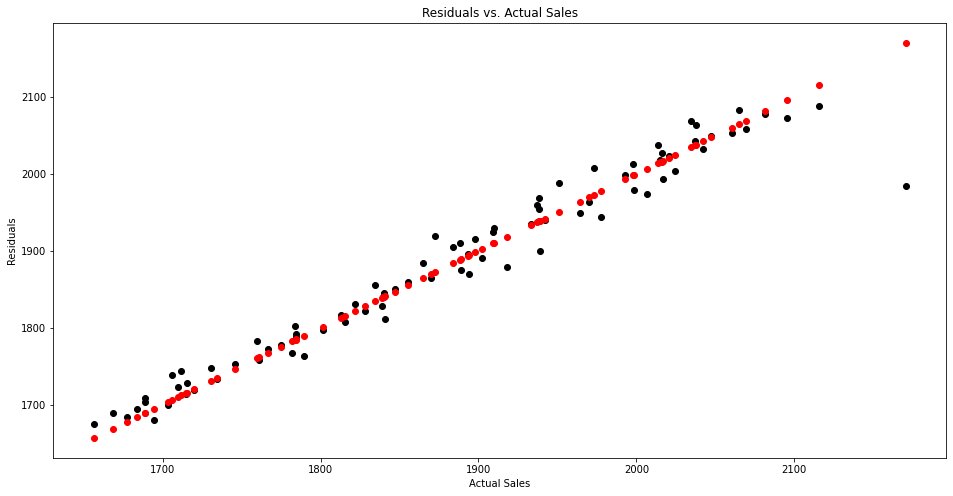

In [26]:
plt.figure(figsize=(16, 8)) 
plt.scatter(ytest, y_pred, color='black')  # actual y and predicted
plt.scatter(ytest, ytest, color='red') # 
plt.title("Residuals vs. Actual Sales") 
plt.xlabel("Actual Sales") 
plt.ylabel("Residuals") 

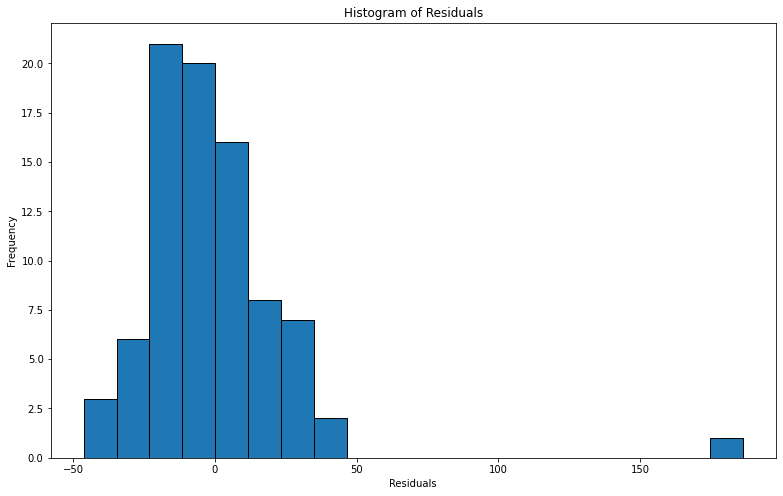

In [27]:
plt.figure(figsize=(13, 8)) 
plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Forecasting into the Future

In [28]:
forecast_dates = pd.date_range(start="2023-01-01", end="2025-12-31", freq="D")
forecast_data = pd.DataFrame({"Date": forecast_dates})
forecast_data

,Date
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
1091,2025-12-27
1092,2025-12-28
1093,2025-12-29
1094,2025-12-30


In [29]:
forecast_data["DayOfWeek"] = forecast_data["Date"].dt.dayofweek
forecast_data["Month"] = forecast_data["Date"].dt.month
forecast_data["Year"] = forecast_data["Date"].dt.year
forecast_data["DayOfYear"] = forecast_data["Date"].dt.dayofyear
forecast_data["WeekOfYear"] = forecast_data["Date"].dt.weekofyear

In [30]:
forecast_data

,Date,DayOfWeek,Month,Year,DayOfYear,WeekOfYear
0,2023-01-01,6,1,2023,1,52
1,2023-01-02,0,1,2023,2,1
2,2023-01-03,1,1,2023,3,1
3,2023-01-04,2,1,2023,4,1
4,2023-01-05,3,1,2023,5,1
...,...,...,...,...,...,...
1091,2025-12-27,5,12,2025,361,52
1092,2025-12-28,6,12,2025,362,52
1093,2025-12-29,0,12,2025,363,1
1094,2025-12-30,1,12,2025,364,1


In [31]:
forecast_sales = model.predict(forecast_data[["DayOfWeek", "Month", "Year", "DayOfYear", "WeekOfYear"]])

In [32]:
forecast_sales

array([2090.82748838, 2096.01621629, 2096.78015222, ..., 2879.00228031,
       2879.76621625, 2880.53015218])

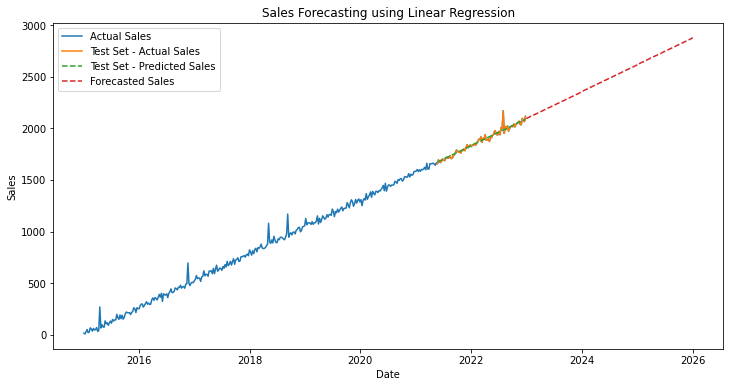

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Sales"], label="Actual Sales")
plt.plot(test_data["Date"], ytest, label="Test Set - Actual Sales")
plt.plot(test_data["Date"], y_pred, label="Test Set - Predicted Sales", linestyle="--")
plt.plot(forecast_data["Date"], forecast_sales, label="Forecasted Sales", linestyle="--") #predicted
plt.title("Sales Forecasting using Linear Regression") 
plt.xlabel("Date") 
plt.ylabel("Sales") 
plt.legend()
plt.show()